<a href="https://colab.research.google.com/github/Chenhere22/Crowdfunding_MachineLearning/blob/main/crowdfunding_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data preprocessing
in other document

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
file_path = '/content/drive/My Drive/Colab Notebooks/project.csv'
df = pd.read_csv(file_path)


Mounted at /content/drive


## Relationship exploration/Visualisation


Plotting by Li



In [ ]:
#plotting 1:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import chi2_contingency
from statsmodels.formula.api import ols
from scipy.stats import normaltest

# Filter out rows with zero or very small values in 'goal' or 'backers'
filtered_df = df[(df['goal'] < 60000) & (df['backers'] <60000)]
sns.relplot(x='goal', y='backers', data=filtered_df)
plt.title('The relationship between goal and backers')
plt.show();

#Plot 2: The Distribution of Funding Across States by Top 5 Main Category
# Select the top 5 main categories (you can customize which categories you want)
top_5_categories = ['Publishing', 'Film & Vedio', 'Music', 'Food', 'Design']

# Filter the dataframe to include only the rows where 'main_category' is in the selected categories
filtered_df = df[df['main_category'].isin(top_5_categories)]

# Create the countplot with the filtered data
sns.countplot(x='state', hue='main_category', data=filtered_df)

# Customize the plot as before
plt.ylim(0, 30000)
plt.xticks(rotation=45)
plt.xlabel('State')
plt.ylabel('Number of Fundings')
plt.title('The Distribution of Funding Across States by Top 5 Main Category')
plt.show();

import statsmodels.api as sm
import statsmodels.formula.api as smf

df['main_category'] = df['main_category'].astype('category')
model = smf.ols('main_category.cat.codes ~ state', data=df).fit()

# Perform ANOVA
anova_results = sm.stats.anova_lm(model, typ=2)
anova_results

#plotting 3:numer of backers of different state

import plotly.graph_objects as go
grouped_data = df.groupby('state')['backers'].sum().reset_index()

# Create the bar plot with aggregated data
fig = go.Figure()
fig.add_trace(go.Bar(x=grouped_data['state'], y=grouped_data['backers']))

# Update the layout
fig.update_layout(
    title='Total Number of Backers by State',
    xaxis_title='State',
    yaxis_title='Number of Backers',
    yaxis=dict(range=[0, grouped_data['backers'].max() * 1.1]))

fig.show();

# Import the library
import statsmodels.api

# Realize the ANOVA test and display the results
result = statsmodels.formula.api.ols('backers ~ state', data=df).fit()
statsmodels.api.stats.anova_lm(result)


#plotting 4: backers of different category and state

fig = px.box(df, x=df['main_category'], y=df['backers'], color=df['state'],
             title='Plot of Backers by Main Category and State')
fig.update_layout(
    xaxis_title='Main Category',
    yaxis_title='Backers')

fig.show();

#plotting 5: backers of different state and category in heatmap

pivot_table = pd.crosstab(df['state'], df['main_category'])
fig = go.Figure(data=go.Heatmap(
    z=pivot_table.values,
    x=pivot_table.columns,
    y=pivot_table.index,
    colorscale='Greens',
    colorbar=dict(title='Count') ))

# Update layout
fig.update_layout(
    title='Heatmap of State vs Main Category',
    xaxis_title='Main Category',
    yaxis_title='State',
    xaxis=dict(tickmode='array', tickvals=pivot_table.columns),
    yaxis=dict(tickmode='array', tickvals=pivot_table.index))

fig.show();

plotting by Francesco

In [ ]:
# Load and preprocess the data
dtype_spec = {
    'usd pledged ': 'str',
    'usd_pledged_real': 'str',
    'usd_goal_real': 'str'
}

df = pd.read_csv('/Users/Francesco1/Downloads/ks-projects-201612.csv', encoding='ISO-8859-1', dtype=dtype_spec, low_memory=False)
df = df.iloc[:, :-4]

df = df.rename(columns={'ID ': 'ID', 'name ':'name', 'category ':'category', 'main_category ':'main_category',
                        'currency ':'currency', 'deadline ': 'deadline', 'goal ':'goal', 'launched ': 'launched',
                        'pledged ':'pledged', 'state ':'state', 'backers ': 'backers', 'country ': 'country',
                        'usd pledged ':'usd_pledged'})

row = df.iloc[19800:20000, :].copy()
row['usd_pledged'] = pd.to_numeric(row['usd_pledged'], errors='coerce')
row['goal'] = pd.to_numeric(row['goal'], errors='coerce')

# Success Rate by State
state_success_rate = row['state'].value_counts(normalize=True)
plt.figure(figsize=(14, 7))
sns.barplot(x=state_success_rate.index, y=state_success_rate.values, palette='Set1')
plt.title('Success Rate by State')
plt.xlabel('State')
plt.ylabel('Success Rate')
plt.xticks(rotation=90)
plt.show()

# Chi-square test for State Success Rate
state_success_count = row['state'].value_counts()
state_success_successful = row[row['state'] == 'successful']['state'].value_counts()
state_summary = pd.concat([state_success_count, state_success_successful], axis=1).fillna(0)
state_summary.columns = ['Total Projects', 'Successful Projects']
state_summary['Failure Projects'] = state_summary['Total Projects'] - state_summary['Successful Projects']
chi2, p, dof, ex = chi2_contingency(state_summary)
print(f"Chi-square test p-value for state success rate: {p}")

# Pledged Amount Distribution by State
plt.figure(figsize=(14, 7))
sns.boxplot(x='state', y='usd_pledged', data=row, palette='Set2')
plt.title('Pledged Amount Distribution by State')
plt.xlabel('State')
plt.ylabel('Pledged Amount (USD)')
plt.xticks(rotation=90)
plt.yscale('log')
plt.show()

# Normality test for pledged amount
for state in row['state'].unique():
    state_data = row[row['state'] == state]['usd_pledged'].dropna()
    if len(state_data) >= 8:
        try:
            stat, p_value = normaltest(state_data)
            print(f"{state} - Normality test p-value: {p_value}")
        except Exception as e:
            print(f"{state} - Normality test failed: {e}")
    else:
        print(f"{state} - Not enough data for normality test")

# Success Rate by Currency
currency_success_rate = row['currency'].value_counts(normalize=True)
plt.figure(figsize=(14, 7))
sns.barplot(x=currency_success_rate.index, y=currency_success_rate.values, palette='Set3')
plt.title('Success Rate by Currency')
plt.xlabel('Currency')
plt.ylabel('Success Rate')
plt.xticks(rotation=90)
plt.show()

# Chi-square test for Currency Success Rate
currency_success_count = row['currency'].value_counts()
currency_success_successful = row[row['state'] == 'successful']['currency'].value_counts()
currency_summary = pd.concat([currency_success_count, currency_success_successful], axis=1).fillna(0)
currency_summary.columns = ['Total Projects', 'Successful Projects']
currency_summary['Failure Projects'] = currency_summary['Total Projects'] - currency_summary['Successful Projects']
chi2, p, dof, ex = chi2_contingency(currency_summary)
print(f"Chi-square test p-value for currency success rate: {p}")

# Average Pledged Amount by Launch Year
row['launch_year'] = pd.to_datetime(row['launched'], errors='coerce').dt.year
row = row.dropna(subset=['usd_pledged', 'launch_year'])

avg_pledged_by_year = row.groupby('launch_year')['usd_pledged'].mean()
plt.figure(figsize=(14, 7))
sns.lineplot(x=avg_pledged_by_year.index, y=avg_pledged_by_year.values, marker='o', color='purple')
plt.title('Average Pledged Amount by Launch Year')
plt.xlabel('Launch Year')
plt.ylabel('Average Pledged Amount (USD)')
plt.show()

# Linear Regression: Pledged Amount ~ Launch Year
model = ols('usd_pledged ~ launch_year', data=row).fit()
print(model.summary())

# Scatter Plot: Pledged Amount vs. Goal Amount by State
palette = {
    'successful': 'green',
    'failed': 'red',
    'canceled': 'orange',
    'live': 'blue',
    'suspended': 'purple',
    'undefined': 'grey'
}

plt.figure(figsize=(14, 7))
sns.scatterplot(x='goal', y='usd_pledged', data=row, hue='state', alpha=0.7, palette=palette)
plt.title('Pledged Amount vs. Goal Amount by State')
plt.xlabel('Goal Amount (USD)')
plt.ylabel('Pledged Amount (USD)')
plt.xscale('log')
plt.yscale('log')
plt.show()

Eunice plotting

In [ ]:
# Calcul de la moyenne des fonds levés pour chaque combinaison de catégorie et d'état  heatmap_data = df.pivot_table(index='State', columns='Category', values='USD_Pledged',  aggfunc='mean')
 # Création de la heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data=df, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=0.5)
plt.title('Influence de la catégorie et de l\'état sur les fonds levés')
plt.xlabel('Catégorie')
plt.ylabel('État')
plt.show()

# Create the boxplot
 plt.figure(figsize=(8, 4))
 sns.boxplot(x='Category', y='USD_Pledged', data=df, palette='Set2')
 plt.title('Distribution of Funds Raised by Category')
 plt.xlabel('Category')
 plt.ylabel('USD Pledged')
 plt.show()

 # Create the violin plot
 plt.figure(figsize=(10, 6))
 sns.violinplot(x='State', y='USD_Pledged', data=df, palette='muted')
 plt.title('Distribution of Pledged Funds by Project State')
 plt.xlabel('State')
 plt.ylabel('USD Pledged')
 plt.show()

# Create scatter plot with regression line
plt.figure(figsize=(10,6))
sns.regplot(x='deadline', y='usd_pledged', data=df,
scatter_kws={'s': 100, 'alpha': 0.7}, ine_kws={'color': 'blue', 'linewidth': 2})
plt.title('Impact of Deadline on Pledged Funds')
plt.xlabel('Days Until Deadline')
plt.ylabel('USD Pledged')
plt.grid(True)
plt.show()

# Create scatter plot with regression line
 plt.figure(figsize=(10,6))
 sns.regplot(x='Days_until_deadline', y='USD_Pledged', data=df,
 scatter_kws={'s': 100, 'alpha': 0.7}, # Customize scatter points l ine_kws={'color': 'blue', 'linewidth': 2}) # Customize regression line  plt.title('Impact of Deadline on Pledged Funds')
 plt.xlabel('Days Until Deadline')
 plt.ylabel('USD Pledged')
 plt.grid(True)
 plt.show()

# Calculate proportions
 state_counts = df.groupby(['category_name',
' project_state']).size().reset_index(name='Count')
 state_counts['Proportion'] =
 state_counts.groupby('category_name')['Count'].transform(lambda x: x / x.sum())
 # Create the bar plot
 plt.figure(figsize=(10, 6))
 sns.barplot(x='category_name', y='Proportion', hue='project_state', data=state_counts,  palette='Set2')
 plt.title('Proportion of Project States by Category')
 plt.xlabel('Category')
 plt.ylabel('Proportion')
 plt.legend(title='State')
 plt.show()


IndentationError: unexpected indent (<ipython-input-20-e8ec51819584>, line 3)

### Modelling

# Modelling

In [ ]:
#outliers and extreme values

In [ ]:
target = df['state']

In [ ]:
df = df.drop(['state','ID','country','currency'], axis=1)

# Perform your operations on target as intended
target = target.replace({'failed': 0, 'canceled': 0, 'live': 0, 'suspended': 0, 'successful': 1})
target = target.astype(int)

In [ ]:
# preprocessing using pineline

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE

num_feas=['goal', 'pledged', 'backers', 'usd_pledged']
cat_feas=['main_category']

num_transformer=Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

cat_transformer=Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

from sklearn.compose import ColumnTransformer
preprocessor=ColumnTransformer(transformers=[
    ('num', num_transformer, num_feas),
    ('cat', cat_transformer, cat_feas)])

df= preprocessor.fit_transform(df)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df,target,test_size=0.2, random_state=42)

In [ ]:
# extreme value

from sklearn.base import BaseEstimator, TransformerMixin

class IQR(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        # Convert X to DataFrame if it's a sparse matrix
        if isinstance(X, pd.DataFrame):
            self.numeric_cols = X.select_dtypes(include=['number']).columns
        else:
            X = pd.DataFrame(X.toarray())  # Convert sparse matrix to dense DataFrame
            self.numeric_cols = X.columns  # All columns are numeric in this case

        self.q1 = X[self.numeric_cols].quantile(0.25)
        self.q3 = X[self.numeric_cols].quantile(0.75)
        self.iqr = self.q3 - self.q1
        return self

    def transform(self, X, y=None):
        # Convert X to DataFrame if it's a sparse matrix
        if not isinstance(X, pd.DataFrame):
            X = pd.DataFrame(X.toarray())  # Convert sparse matrix to dense DataFrame

        # Calculate the lower and upper bounds for numeric columns only
        lower_bound = self.q1 - 1.5 * self.iqr
        upper_bound = self.q3 + 1.5 * self.iqr

        # Apply clipping only to numeric columns
        X[self.numeric_cols] = X[self.numeric_cols].clip(lower=lower_bound, upper=upper_bound, axis=1)
        return X

iqr = IQR()
X_train = iqr.fit_transform(X_train)
X_test = iqr.transform(X_test)

print("Columns in X_train:", X_train.columns)
print("Columns in X_test:", X_test.columns)

Columns in X_train: RangeIndex(start=0, stop=19, step=1)
Columns in X_test: RangeIndex(start=0, stop=19, step=1)


## Modelling 1: Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)

print(f"Model accuracy: {accuracy:.4f}")


Model accuracy: 0.8707


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.94      0.90     41351
           1       0.88      0.74      0.80     22515

    accuracy                           0.87     63866
   macro avg       0.87      0.84      0.85     63866
weighted avg       0.87      0.87      0.87     63866

Confusion Matrix:
[[39020  2331]
 [ 5927 16588]]


#Modelling 2: Suport vector machine (classfication)

In [ ]:
from sklearn import svm
clf=svm.SVC(gamma=0.01,kernel='poly')
clf.fit(X_train,y_train)

SVC(gamma=0.01, kernel='poly')

In [ ]:
y_pred=clf.predict(X_test)
pd.crosstab(y_test,y_pred)

col_0,0
state,
0,41351
1,22515


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

accuracy = clf.score(X_test, y_test)

print(f"Model accuracy: {accuracy:.4f}")
# Generate a classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Model accuracy: 0.6475
Classification Report:
               precision    recall  f1-score   support

           0       0.65      1.00      0.79     41351
           1       0.00      0.00      0.00     22515

    accuracy                           0.65     63866
   macro avg       0.32      0.50      0.39     63866
weighted avg       0.42      0.65      0.51     63866

Confusion Matrix:
[[41351     0]
 [22515     0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#Modelling 3: Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_jobs=-1,random_state=321)
rf.fit(X_train,y_train)

y_pred=rf.predict(X_test)
accuracy=rf.score(X_test,y_test)
print(f"Model accuracy on test dataset: {accuracy:.4f}")
print('Model accuracy train dataset:', rf.score(X_train,y_train))

#check overfitting: hyparam metrics of rf

from sklearn.metrics import classification_report, confusion_matrix
#classfication report and confusion matrix
report = classification_report(y_test, y_pred)
print('classification report:\n',report)

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n",conf_matrix)

Model accuracy on test dataset: 0.9806
Model accuracy train dataset: 0.9882291691132145
classification report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98     41351
           1       0.96      0.99      0.97     22515

    accuracy                           0.98     63866
   macro avg       0.98      0.98      0.98     63866
weighted avg       0.98      0.98      0.98     63866

Confusion Matrix:
 [[40347  1004]
 [  235 22280]]


# Modelling 4: Deep Learning

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
model = Sequential()
# Input Layer
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))

# Hidden Layer 1
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

# Hidden Layer 2
model.add(Dense(32, activation='relu'))

# Output Layer (Binary Classification: 0 or 1 for success/failure)
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=32)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/20
7984/7984 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - accuracy: 0.8448 - loss: 0.3435 - val_accuracy: 0.9171 - val_loss: 0.2102
Epoch 2/20
7984/7984 ━━━━━━━━━━━━━━━━━━━━ 43s 3ms/step - accuracy: 0.9157 - loss: 0.2109 - val_accuracy: 0.9454 - val_loss: 0.1533
Epoch 3/20
7984/7984 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9251 - loss: 0.1917 - val_accuracy: 0.9455 - val_loss: 0.1412
Epoch 4/20
7984/7984 ━━━━━━━━━━━━━━━━━━━━ 48s 3ms/step - accuracy: 0.9252 - loss: 0.1918 - val_accuracy: 0.9481 - val_loss: 0.1388
Epoch 5/20
7984/7984 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9305 - loss: 0.1836 - val_accuracy: 0.9540 - val_loss: 0.1363
Epoch 6/20
7984/7984 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.9326 - loss: 0.1792 - val_accuracy: 0.9643 - val_loss: 0.1145
Epoch 7/20
7984/7984 ━━━━━━━━━━━━━━━━━━━━ 55s 5ms/step - accuracy: 0.9349 - loss: 0.1717 - val_accuracy: 0.9606 - val_loss: 0.1154
Epoch 8/20
7984/7984 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9367 - loss: 0

In [1]:
# Evaluate the model on test data (returns loss and accuracy)
loss, accuracy = model.evaluate(X_test, y_test)

# Print model accuracy on test data
print(f"FCNN Model accuracy on test data: {accuracy:.4f}")

# You cannot use .score() with Keras models for the training data,
# instead, use .evaluate() for training data as well
train_loss, train_accuracy = model.evaluate(X_train, y_train)
print(f"FCNN Model accuracy on training data: {train_accuracy:.4f}")

# Predictions on the test set
y_pred_prob = model.predict(X_test)

# Convert predicted probabilities to class labels
# Assuming binary classification, convert probabilities to 0 or 1
y_pred = (y_pred_prob > 0.5).astype(int)

# If it's multi-class classification, use argmax:
# y_pred = y_pred_prob.argmax(axis=1)

# Classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

# Generate and print classification report
report = classification_report(y_test, y_pred)
print('Classification report:\n', report)

# Generate and print confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


NameError: name 'model' is not defined

# Modelling 5: XGBoost

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

accuracy = xgb.score(X_test, y_test)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"XGBoost Model accuracy: {accuracy:.4f}")
print('classification report:\n',report)
print('confusion matrix:\n',conf_matrix)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:01:12] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Model accuracy: 0.9820
classification report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     41351
           1       0.96      0.99      0.97     22515

    accuracy                           0.98     63866
   macro avg       0.98      0.98      0.98     63866
weighted avg       0.98      0.98      0.98     63866

confusion matrix:
 [[40353   998]
 [  152 22363]]


cross validation with GridSearchCV




In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2]
}
# Create the XGBClassifier instance
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='accuracy',  # You can use other scoring metrics if needed
    cv=5,  # Number of cross-validation folds
    verbose=1,  # Print out progress messages
    n_jobs=-1  # Use all available cores
)

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = best_model.score(X_test, y_test)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Best XGBoost Model accuracy: {accuracy:.4f}")
print('Classification report:\n', report)
print('Confusion matrix:\n', conf_matrix)
print('Best Hyperparameters:\n', grid_search.best_params_)


Fitting 5 folds for each of 2187 candidates, totalling 10935 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Average Bias, Average Variance and Test RMSE

In [ ]:
from sklearn.model_selection import KFold
import numpy as np
from sklearn.metrics import mean_squared_error

# Initialize KFold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
biases = []
variances = []

for train_index, val_index in kf.split(X_train):
    X_train_fold = X_train.iloc[train_index]
    X_val_fold = X_train.iloc[val_index]
    y_train_fold = y_train.iloc[train_index]
    y_val_fold = y_train.iloc[val_index]

    # Train the model (XGBClassifier)
    xgb.fit(X_train_fold, y_train_fold)

    # Predict on validation set
    predictions = xgb.predict(X_val_fold)

    # Compute bias (using accuracy error for classification)
    bias = np.mean(predictions != y_val_fold)
    biases.append(bias)

    # Variance for XGBClassifier: Calculating variance based on predictions over multiple folds
    # Since we can't access individual trees, we can look at the variation in predictions over different folds
    variances.append(np.var(predictions))

# Compute average bias and variance
average_bias = np.mean(biases)
average_variance = np.mean(variances)

print(f"Average Bias: {average_bias:.4f}")
print(f"Average Variance: {average_variance:.4f}")

# Evaluate on the test set
y_test_pred = xgb.predict(X_test)
test_error = mean_squared_error(y_test, y_test_pred, squared=False)  # Root Mean Squared Error (RMSE)
print(f"Test RMSE: {test_error:.4f}")


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[06:43:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[06:44:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[06:44:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[06:44:21] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning:

[06:44:28] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




Average Bias: 0.0183
Average Variance: 0.2324
Test RMSE: 0.1344


Type I Error and Type II Error

In [ ]:
# Extract True Positive, False Positive, True Negative, False Negative
tn, fp, fn, tp = conf_matrix.ravel()  # This works for binary classification

# Calculate False Positives (Type I Error) and False Negatives (Type II Error)
false_positives = fp
false_negatives = fn

print(f"False Positives (Type I Error): {false_positives}")
print(f"False Negatives (Type II Error): {false_negatives}")

False Positives (Type I Error): 998
False Negatives (Type II Error): 152


# Feature importance

In [ ]:
import pandas as pd

# Convert X_train to DataFrame if it's not already
if not hasattr(X_train, 'columns'):
    # You need to provide the column names if converting from array
    num_features = X_train.shape[1]
    feature_names = [f'feature_{i}' for i in range(num_features)]
    X_train = pd.DataFrame(X_train, columns=feature_names)
else:
    feature_names = X_train.columns

# Print the first few rows of X_train to verify
print("X_train preview:")
print(X_train.head())
print("Feature names:")
print(feature_names)


feature_importance = xgb.feature_importances_

# Print feature importances to verify
print("Feature Importances:")
print(feature_importance)

X_train preview:
         0         1         2         3    4    5    6    7    8    9    10  \
0 -0.028481 -0.094498 -0.100854 -0.089588  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1 -0.032843 -0.097288 -0.108298 -0.092552  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2 -0.029353 -0.097299 -0.104044 -0.092564  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3 -0.039647 -0.094887 -0.098727 -0.090001  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4 -0.038077 -0.095043 -0.104044 -0.090167  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

    11   12   13   14   15   16   17   18  
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
Feature names:
RangeIndex(start=0, stop=19, step=1)
Feature Importances:
[0.2145007  0.20740885 0.5634424  0.01464805 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.

In [ ]:
# Fit and transform the data
df=pd.DataFrame(df)

# Extract feature names
encoded_feature_names = preprocessor.transformers_[1][1].named_steps['onehot'].get_feature_names_out(cat_feas)
final_feature_names = num_feas + list(encoded_feature_names)

# Convert the transformed data (NumPy array) to a DataFrame
X_encoded_df = pd.DataFrame(df, columns=final_feature_names)

# Print the transformed DataFrame and feature names
print("Transformed DataFrame:")
print(X_encoded_df)

print("\nFeature Names:")
print(X_encoded_df.columns)

Transformed DataFrame:
        goal  pledged  backers  usd_pledged  main_category_Art  \
0        NaN      NaN      NaN          NaN                NaN   
1        NaN      NaN      NaN          NaN                NaN   
2        NaN      NaN      NaN          NaN                NaN   
3        NaN      NaN      NaN          NaN                NaN   
4        NaN      NaN      NaN          NaN                NaN   
...      ...      ...      ...          ...                ...   
319323   NaN      NaN      NaN          NaN                NaN   
319324   NaN      NaN      NaN          NaN                NaN   
319325   NaN      NaN      NaN          NaN                NaN   
319326   NaN      NaN      NaN          NaN                NaN   
319327   NaN      NaN      NaN          NaN                NaN   

        main_category_Comics  main_category_Crafts  main_category_Dance  \
0                        NaN                   NaN                  NaN   
1                        NaN      

In [ ]:
import pandas as pd

# Assuming df is your transformed feature matrix
df = pd.DataFrame(df)

# Extract the feature names from both numerical and categorical parts
encoded_feature_names = preprocessor.transformers_[1][1].named_steps['onehot'].get_feature_names_out(cat_feas)
final_feature_names = num_feas + list(encoded_feature_names)

# Convert the transformed data (NumPy array) to a DataFrame with feature names
X_encoded_df = pd.DataFrame(df, columns=final_feature_names)

# Create a DataFrame to map feature names to their importance
feature_importance_df = pd.DataFrame({
    'Feature Name': final_feature_names,
    'Importance': feature_importance
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importance dataframe
print("Feature Importances:")
print(feature_importance_df)


Feature Importances:
                  Feature Name  Importance
2                      backers    0.563442
0                         goal    0.214501
1                      pledged    0.207409
3                  usd_pledged    0.014648
11          main_category_Food    0.000000
17    main_category_Technology    0.000000
16    main_category_Publishing    0.000000
15   main_category_Photography    0.000000
14         main_category_Music    0.000000
13    main_category_Journalism    0.000000
12         main_category_Games    0.000000
9        main_category_Fashion    0.000000
10  main_category_Film & Video    0.000000
8         main_category_Design    0.000000
7          main_category_Dance    0.000000
6         main_category_Crafts    0.000000
5         main_category_Comics    0.000000
4            main_category_Art    0.000000
18       main_category_Theater    0.000000


In [ ]:
# Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': final_feature_names,
    'Importance': feature_importance
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the DataFrame
print(importance_df)

                       Feature  Importance
2                      backers    0.563442
0                         goal    0.214501
1                      pledged    0.207409
3                  usd_pledged    0.014648
11          main_category_Food    0.000000
17    main_category_Technology    0.000000
16    main_category_Publishing    0.000000
15   main_category_Photography    0.000000
14         main_category_Music    0.000000
13    main_category_Journalism    0.000000
12         main_category_Games    0.000000
9        main_category_Fashion    0.000000
10  main_category_Film & Video    0.000000
8         main_category_Design    0.000000
7          main_category_Dance    0.000000
6         main_category_Crafts    0.000000
5         main_category_Comics    0.000000
4            main_category_Art    0.000000
18       main_category_Theater    0.000000


Feature Importance

SHAP for interpreting model

In [ ]:
pip install shap

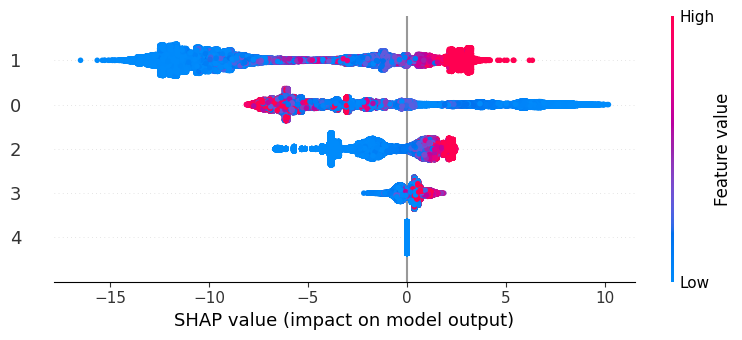

In [ ]:
import shap
import pandas as pd
import numpy as np

# Assuming 'xgb' is your trained XGBoost model and 'X_test' is your test DataFrame
# Create a SHAP explainer
explainer = shap.Explainer(xgb)

# Calculate SHAP values for the test set
shap_values = explainer(X_test)

# Convert SHAP values to a DataFrame for easier manipulation
shap_values_df = pd.DataFrame(shap_values.values, columns=X_test.columns)

# Get the absolute values of the SHAP values and sum them for each feature
feature_importance = np.abs(shap_values_df).sum(axis=0)

# Get the indices of the top N features with the highest importance
top_n = 5
top_features = feature_importance.nlargest(top_n).index

# Filter SHAP values to keep only the top features
top_shap_values = shap_values_df[top_features]

# Create a summary plot for the top features
shap.summary_plot(top_shap_values.values, X_test[top_features], feature_names=top_features)

